In [1]:
%load_ext autoreload

# Example of how to load a signal using FRNN loaders
This notebook illustrates how instances of the `signal` class can be used to provide
access to measurements on the Princeton university clusters.

In [13]:

from os.path import join
import matplotlib.pyplot as plt

# Signals are defined on machines. We show how to load D3D data and need to import this machine
from plasma.primitives.machine import MachineD3D
# This instance provides the definitions of the filterscope data
from plasma.data.user_signals import fs07, betan
# We also need a shot object that provides information where to load the data from
from plasma.primitives.shots import Shot


First, let's investigate the Machine class. It's main purpose is to be a data structure that identifies which machine a signal lives on. It also provides data loading mechanisms to fetch signal data etc.

In [6]:
# Besides data loading mechanisms, Machine classes provide a name that allows to identify them
MachineD3D.name

'd3d'

To load data into the signal we need to have a dummy-class for a shot.
This class just needs to provide a machine and a shot number so that the
load methods from the shot know where to fetch data from

In [26]:
class dummy_shot():
    """A dummy shot class that provides a machine and a shot number."""
    def __init__(self, machine, number):
        self.machine = machine
        self.number = number

my_shot = dummy_shot(MachineD3D, 183463)

We now use this class in the data loader methods of the signals we imported on the top.
This allows us to load the desired data from txt files on the file system.

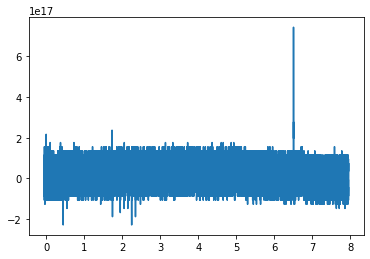

In [27]:
# Example 1 / Filterscope data
t_fs07, sig_fs07 = fs07.load_data("/projects/FRNN/signal_data_new_2021/", my_shot)
plt.plot(t_fs07, sig_fs07)


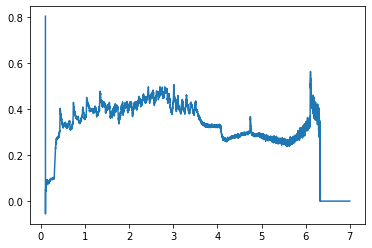

In [28]:
# Example 2 / beta n data
t_betan, sig_betan = betan.load_data("/projects/FRNN/signal_data_new_2021/", my_shot)
plt.plot(t_betan, sig_betan)

In [25]:
# The signals are all sampled on their original sampling rate
sig_fs07.shape
sig_betan.shape

(7823, 1)